*@author Laura María Pedraza Gómez*

## Dataset Wine

**Importación inicial**

In [502]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

## Preparación de los datos

Primero vamos a visualizar la información del dataset para determinar como debe de ser la preparación de los datos.

### Lectura del conjunto de datos

In [506]:
df = pd.read_csv("wine.csv")

### Visualización preliminar de la información

In [508]:
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [509]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [511]:
# Número de ejemplos de cla clase Wine
df["Wine"].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

Existen 3 tipos de vino

In [513]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

In [514]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

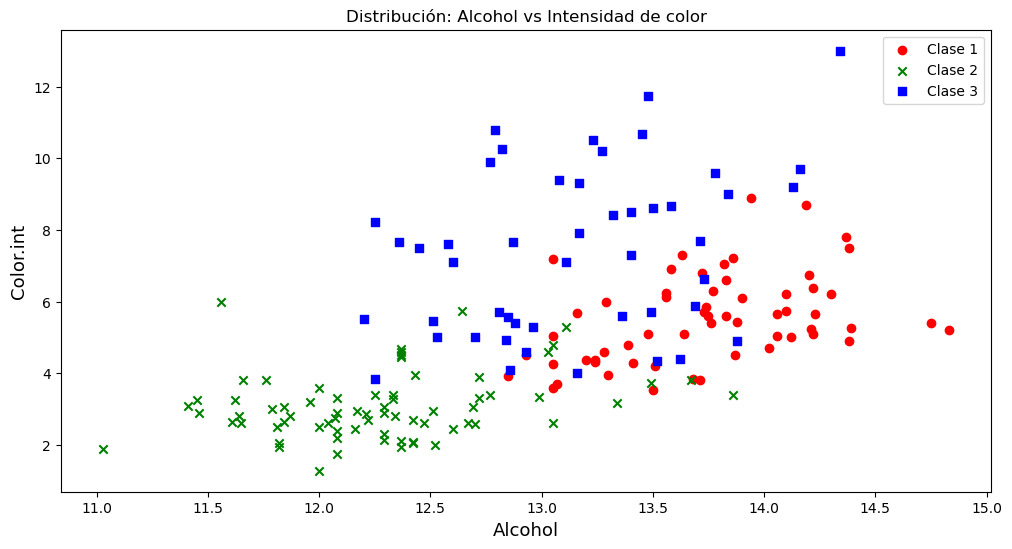

In [515]:
plt.figure(figsize=(12, 6))

# Representación para los tres tipos de vino
plt.scatter(df["Alcohol"][df["Wine"] == 1], df["Color.int"][df["Wine"] == 1], c="r", marker="o", label="Clase 1")
plt.scatter(df["Alcohol"][df["Wine"] == 2], df["Color.int"][df["Wine"] == 2], c="g", marker="x", label="Clase 2")
plt.scatter(df["Alcohol"][df["Wine"] == 3], df["Color.int"][df["Wine"] == 3], c="b", marker="s", label="Clase 3")

plt.xlabel("Alcohol", fontsize=13)
plt.ylabel("Color.int", fontsize=13)
plt.title("Distribución: Alcohol vs Intensidad de color")
plt.legend()
plt.show()

### División del conjunto de datos

In [517]:
# División del dataset en entrenamiento, validación y prueba
train_val, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_val, test_size=0.25, random_state=42)

In [518]:
# Separación de características (X) y variable objetivo (y)
X_train = train_set.drop("Wine", axis=1)
y_train = train_set["Wine"].copy()

X_val = val_set.drop("Wine", axis=1)
y_val = val_set["Wine"].copy()

X_test = test_set.drop("Wine", axis=1)
y_test = test_set["Wine"].copy()


### Preparación del conjunto de datos

No hay valores nulos ni infinitos, por lo que no sería necesario realizar una preparación de los datros. Aun así, la preparación de los datos se vería de la siguiente manera.

In [521]:
# Eliminamos el atributo que tiene valores infinitos
# X_train = X_train.drop("", axis=1)
# X_val = X_val.drop("", axis=1)
# X_test = X_test.drop("", axis=1)

# Como no hay valores infinitos, esta parte de código la dejo comentada para que no cause error. 
# Si lo hubiera, en el lugar de las comillas se tendría que poner el campo que tiene dichos valores infinitos.

In [522]:
# Rellenamos los valores nulos con la mediana o la media
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [523]:
# Rellenamos los valores nulos
X_train_prep = imputer.fit_transform(X_train)
X_val_prep = imputer.fit_transform(X_val)
X_test_prep = imputer.fit_transform(X_test)

In [524]:
# Transformamos el resultado a un DataFrame de Pandas
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train.columns, index=y_train.index)
X_val_prep = pd.DataFrame(X_val_prep, columns=X_val.columns, index=y_val.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=X_test.columns, index=y_test.index)

In [525]:
X_train_prep.head(10)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


In [526]:
# Comprobamos si hay valores nulos en el conjunto de datos de entrenamiento
is_null = X_train_prep.isna().any()
is_null[is_null]

Series([], dtype: bool)

## Aplicación de algoritmos de SVM

## SVM: Kernel Lineal

### Conjunto de datos reducido

In [530]:
# Reducimos el conjunto de datos para representarlo gráficamente
X_train_reduced = X_train_prep[["Alcohol", "Color.int"]].copy()
X_val_reduced = X_val_prep[["Alcohol", "Color.int"]].copy()


In [531]:
X_train_reduced

,Alcohol,Color.int
54,13.74,5.85
126,12.43,3.94
21,12.93,4.50
46,14.38,4.90
156,13.84,9.01
...,...,...
62,13.67,3.80
134,12.51,5.45
76,13.03,4.60
110,11.46,2.90


In [532]:
from sklearn.svm import SVC

# SVM Large Margin Classification
svm_clf = SVC(kernel="linear", C=50) 
svm_clf.fit(X_train_reduced, y_train)

SVC(C=50, kernel='linear')

**Representación del límite de decisión**

In [534]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

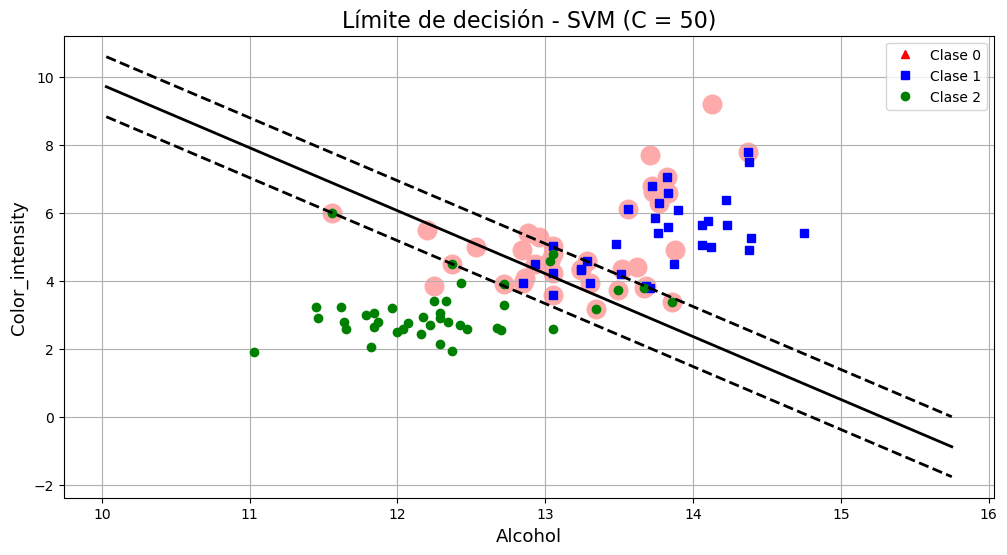

In [535]:
plt.figure(figsize=(12, 6))

# Representación de cada clase
plt.plot(X_train_reduced.values[:, 0][y_train == 0], X_train_reduced.values[:, 1][y_train == 0], "r^", label="Clase 0")
plt.plot(X_train_reduced.values[:, 0][y_train == 1], X_train_reduced.values[:, 1][y_train == 1], "bs", label="Clase 1")
plt.plot(X_train_reduced.values[:, 0][y_train == 2], X_train_reduced.values[:, 1][y_train == 2], "go", label="Clase 2")

# Límite de decisión para el modelo SVM entrenado
plot_svc_decision_boundary(svm_clf, 
                           X_train_reduced.values[:, 0].min() - 1, 
                           X_train_reduced.values[:, 0].max() + 1)

# Configuración de la gráfica
plt.title(f"Límite de decisión - SVM (C = {svm_clf.C})", fontsize=16)
plt.xlabel("Alcohol", fontsize=13)
plt.ylabel("Color_intensity", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

**Predicción del conjunto de datos reducido**

In [537]:
y_pred = svm_clf.predict(X_val_reduced)

In [538]:
# Evaluación con F1 Score para clasificación multiclase
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.7452485380116959


### Conjunto de datos completo

In [540]:
# Entrenamiento con todo el conjunto de datos
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_train_prep, y_train)

SVC(C=1, kernel='linear')

In [541]:
y_pred = svm_clf.predict(X_val_prep)

In [542]:
# Evaluación con F1 Score para clasificación multiclase
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.9457411645054665


## SVM: Kernel no lineal

### Polynomial Kernel 1

**Entrenamiento con conjunto de datos reducido**

In [546]:
# Para representar el límite de decisión tenemos que pasar la variable objetivo a numérica
y_train_num = y_train.factorize()[0]
y_val_num = y_val.factorize()[0]

In [547]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    #Convierto características de entrada en polinómicas y llega a un
    #grado máximo de 3
        ("poly_features", PolynomialFeatures(degree=3)),
    #Escalo mis características
        ("scaler", StandardScaler()),
    #Entreno un algoritmo lineal como el anterior pero con características
    #polinómicas y así tengo un resultado con límite no lineal
        ("svm_clf", LinearSVC(C=20, loss="hinge", random_state=42, max_iter=100000, dual=True))
    ])

polynomial_svm_clf.fit(X_train_reduced, y_train_num)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=20, dual=True, loss='hinge', max_iter=100000,
                           random_state=42))])

**Representación del límite de decisión**

In [549]:
# Función para mostrar el dataset
def plot_dataset(X, y):
    for clase in np.unique(y):
        plt.plot(X[:, 0][y == clase], X[:, 1][y == clase], ".", label=f"Clase {clase}")
    plt.legend()

In [550]:
# Función para representar las predicciones y el margen
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = pd.DataFrame(np.c_[x0.ravel(), x1.ravel()], columns=X_train_reduced.columns)
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

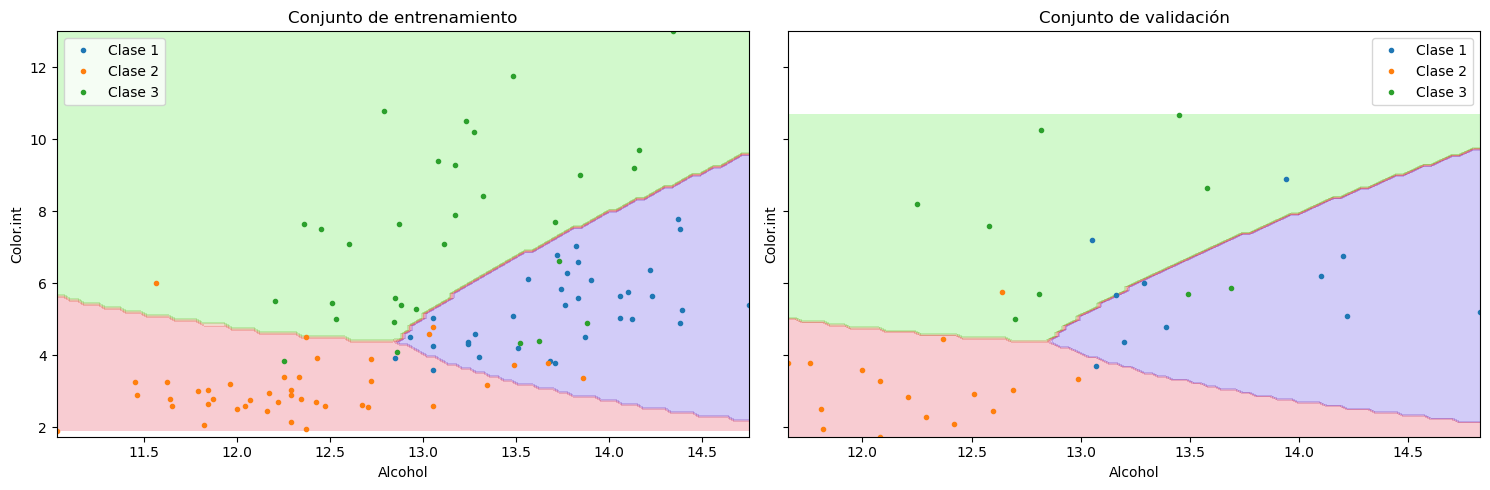

In [551]:
# Visualización
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

# Primera gráfica: conjunto de entrenamientp
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train)
plot_predictions(polynomial_svm_clf, [
    X_train_reduced["Alcohol"].min(), X_train_reduced["Alcohol"].max(),
    X_train_reduced["Color.int"].min(), X_train_reduced["Color.int"].max()
])
plt.xlabel("Alcohol")
plt.ylabel("Color.int")
plt.title("Conjunto de entrenamiento")

# Segunda gráfica: conjunto de validación
plt.sca(axes[1])
plot_dataset(X_val_reduced.values, y_val)
plot_predictions(polynomial_svm_clf, [
    X_val_reduced["Alcohol"].min(), X_val_reduced["Alcohol"].max(),
    X_val_reduced["Color.int"].min(), X_val_reduced["Color.int"].max()
])
plt.xlabel("Alcohol")
plt.ylabel("Color.int")
plt.title("Conjunto de validación")

plt.tight_layout()
plt.show()

**Predicción con el conjunto de datos reducido**

In [553]:
y_pred = polynomial_svm_clf.predict(X_val_reduced)

In [554]:
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.037037037037037035


### Polynomial Kernel 2

**Entrenamiento con conjunto de datos reducido**

In [557]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20)
svm_clf.fit(X_train_reduced, y_train_num)

SVC(C=20, coef0=10, kernel='poly')

**Representación del límite de decisión**

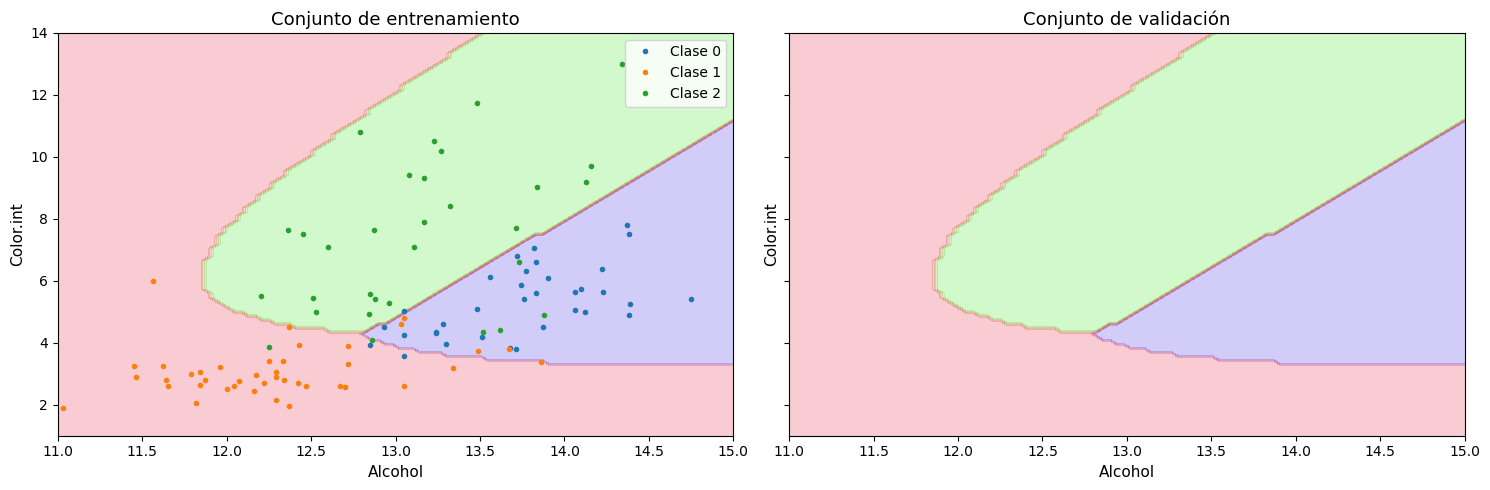

In [559]:
# Visualización
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

# Primera gráfica: conjunto de entrenamiento
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train_num)
plot_predictions(svm_clf, [11, 15, 1, 14])
plt.xlabel("Alcohol", fontsize=11)
plt.ylabel("Color.int", fontsize=11)
plt.title("Conjunto de entrenamiento", fontsize=13)

# Segunda gráfica: conjunto de validación
plt.sca(axes[1])
plot_dataset(X_val_reduced.values, y_val)
plot_predictions(svm_clf, [11, 15, 1, 14]) 
plt.xlabel("Alcohol", fontsize=11)
plt.ylabel("Color.int", fontsize=11)
plt.title("Conjunto de validación", fontsize=13)

plt.tight_layout()
plt.show()

**Predicción con un conjunto de datos reducido**

In [561]:
y_pred = svm_clf.predict(X_val_reduced)

In [562]:
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.036375661375661374


**Predicción con el conjunto de datos completo**

In [564]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=40)
svm_clf.fit(X_train_prep, y_train_num)

SVC(C=40, coef0=10, kernel='poly')

In [565]:
y_pred = svm_clf.predict(X_val_prep)

In [566]:
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.019230769230769232


### Gaussian Kernel

**Entrenamiento con un conjunto de datos reducido**

In [569]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train_reduced, y_train_num)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.5))])

**Representación del límite de decisión**

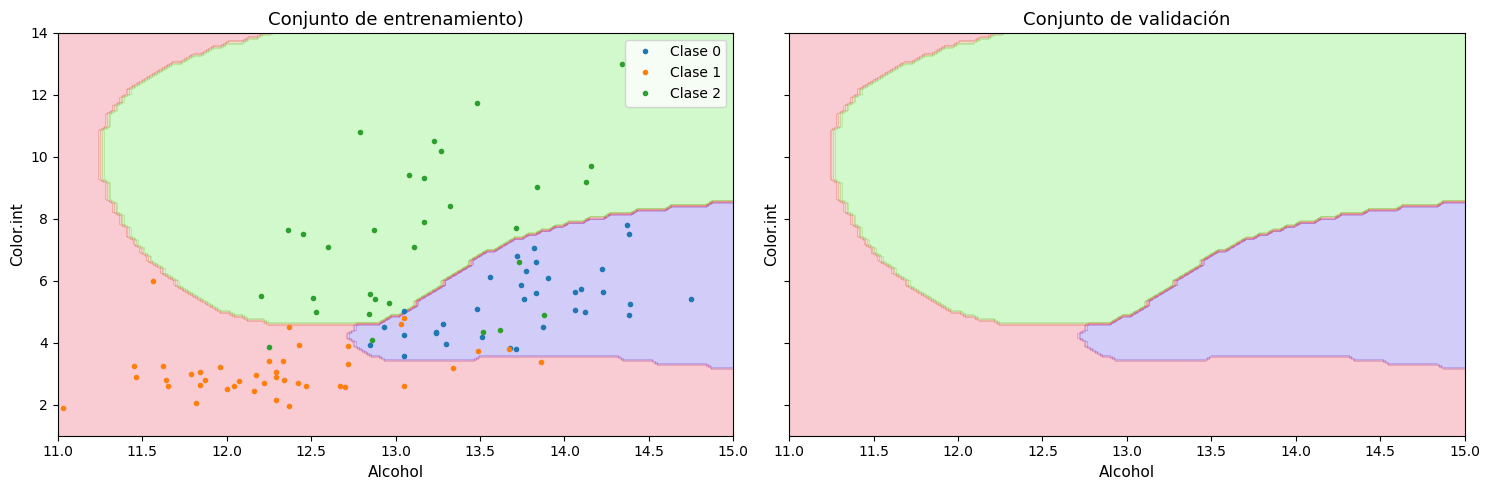

In [571]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

# Primer gráfico: conjunto de entrenamiento
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train_num)
plot_predictions(rbf_kernel_svm_clf, [11, 15, 1, 14])
plt.xlabel("Alcohol", fontsize=11)
plt.ylabel("Color.int", fontsize=11)
plt.title("Conjunto de entrenamiento)", fontsize=13)

# Segundo gráfico: conjunto de validación
plt.sca(axes[1])
plot_dataset(X_val_reduced.values, y_val)
plot_predictions(rbf_kernel_svm_clf, [11, 15, 1, 14])
plt.xlabel("Alcohol", fontsize=11)
plt.ylabel("Color.int", fontsize=11)
plt.title("Conjunto de validación", fontsize=13)

plt.tight_layout()
plt.show()


**Predicción con un conjunto de datos reducido**

In [573]:
y_pred = rbf_kernel_svm_clf.predict(X_val_reduced)

In [574]:
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.017857142857142856


**Predicción con un conjunto de datos completo**

In [576]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train_prep, y_train_num)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.05))])

In [577]:
y_pred = rbf_kernel_svm_clf.predict(X_val_prep)

In [578]:
f1 = f1_score(y_val, y_pred, average='macro')  
print("F1 Score:", f1)

F1 Score: 0.019230769230769232
